# 1. Atomic Neural Networks

The first attempt to build atomic neural network is how should we represent the atoms.

Unlike our previous example of training a single-variable function, 
our input is a sparse collection of atomic positions and atoms.
How can we train the parameters, if the input size varies?



## 1.1 Coloumb matrix

Early attempts in this direction often require the whole atomic structure (e.g. Coulomb matrix, internal coordinates as input). This works fine if our system is fixed, for example, the trajectory of a certain 
configuration of atoms.

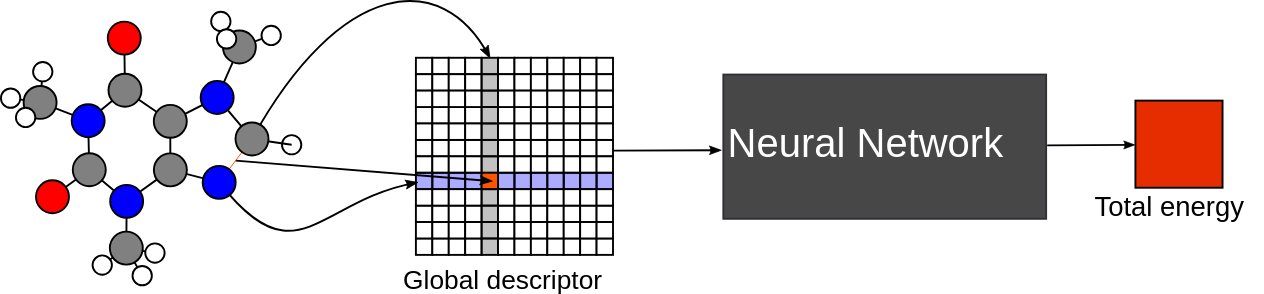

Although these approaches were found to be useful for describing certain reaction, it is limited for more general purposes, as the input-size must be fixed.
Imagine you would like to train the network on a dataset of small molecules, and try to predict about large systems, or train the network with MD data of water clusters and simulate bulk water, you will not be able 
to describe the large system and the small system with the same input features.

## 1.2 Atomic decomposition

One solution of to address this problem is to predict on **atoms** instead of the **system**.
Furthermore, one only describe the atom with its environment (within a certain cutoff range).
This is a reasonable approximation in most cases, and allows one to 

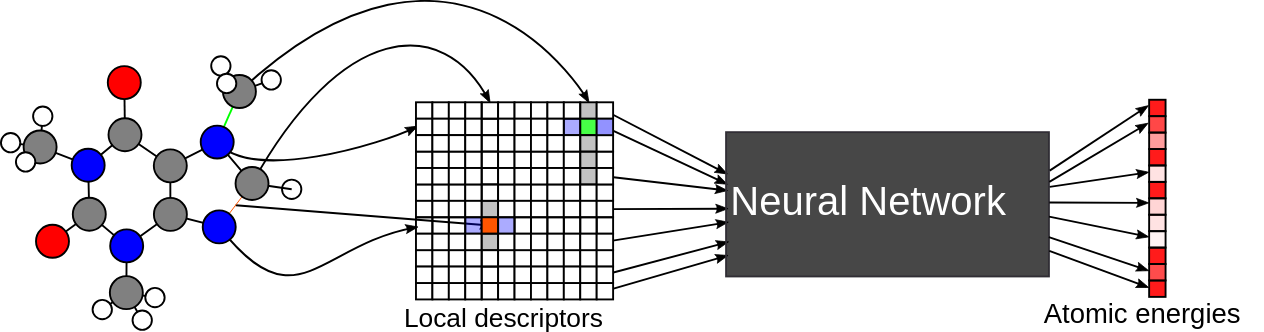

## 1.3 Symmetry functions

In practice, the **atomic description** is given by symmetry functions. 
The word symmetry refers to the symmetries that an atomic description should obey.
- Rotation of the system
- The translation of the system
- The permutation of nearby atoms

Behler's symmetry function address summing up contributions of nearby atoms,
where each atomic contribution is some function of the distance between 

$g_ik = \sum_{j} f_k(r_{ij})$, where j indicates the neighbour atom, f_k is the kth symmetry function
and g_ik, is the kth description of the atom.

Essetialy, this corepond to some fraction of the radial distribution funtion of the central atoms.
Similar approach can be used with anglar distribution or evan dihedral distributions, to improve the 
atomic description.

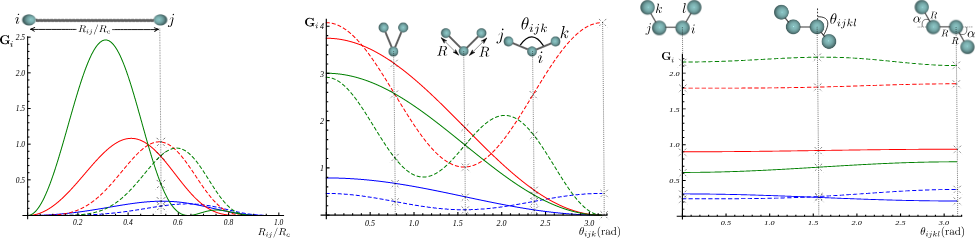

## 1.3 Graph convolution networks

The operation of summing contribution of neighbouring atoms is similar to 
the convolution operetion in convolution neural networks used in image recognition, 
where low-level features are used to construct higher-level ones.
<img src="figures/cnn.png" alt="drawing" style="width:300px;"/>

One can apply similar approach to atomic neural networks. 
Instead of predicting the result at once, 
one predict the low-level features of the atom at first (bond order, polarization, etc), 
and get the final result with concatenated layers (like atomic energy).

Since one are essentially doing convolution operation on the graph (of neighbouring atoms)
this approach is called graph convolution networks.
Different intuitions exist for this graph convolution operation. 
For example, SchNet uses filters to collect properties from neighboring atoms.

$g_{ik} = \sum_{j} e_k(r_{ij}) \times p_j$, where $p_j$ indicates the property of neighbour atom, e_k is the kth filter
and g_ik, is the kth description of the atom.


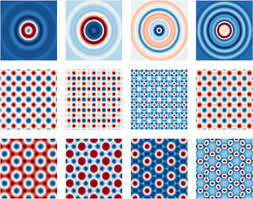



### PiNN

Our network, has a slightly different explaination. We see the neighbor-atom contributions 
as interaction between atoms instead of a filter to pass information.
We therefore construct a radial dependent funtion from atomic properties,
instead of collecting features from atoms.

$g_{ik} = \sum_{j}\sum_b e_b(r_{ij}) \times f_{k,b}(p_i, p_j)$,  
where $p_i, p_j$ indicates the property of both atoms, $e_b$ is the basis function, and $f_{k,b}$ is the learnt prediction of the weights.

<img src="figures/pi-layer.svg" alt="drawing" style="width:500px;"/>

## 1.4 Structures atomic neural networks

The different atomic neural networks can to some extent be generalized into three types of operations (or layers).

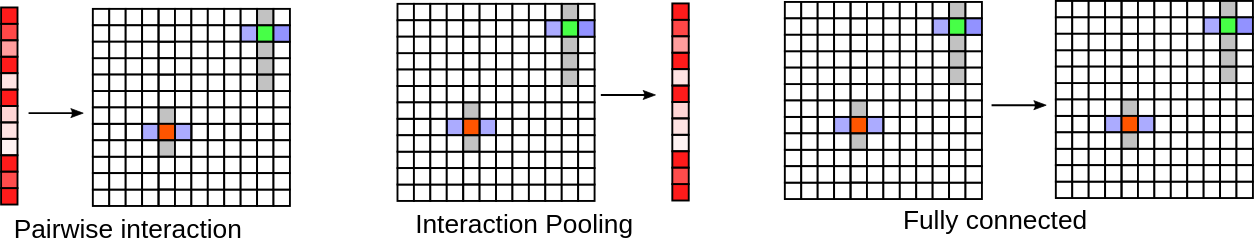

- Fully connected layers are just the densely connect layer we've used to fit certain (and arbitrary) function.
- Interaction pooling layer is the operation that adds neighour contributions to the central atom.
- Pairwise interaction layer is the opereation of transforming atomic properties to pairwise interaction terms.

Therefore, the PiNN co